# Student Alcohol Consumption

### 도비's 스카이캐슬

- 지: 학생의 학업의욕?(higher), 성적(G1-3)을 높이고 싶다면 어떤 요소가 개선되어야할까? (민수민수)
- 덕: 학생의 비행률 - 음주여부(DAlc, WAlc), 결석(absences), 낮은 성적?을 지도하고 싶다면 어떤 점을 개선해야할까? (서현서현)
- 체: 학생의 건강(health)을 나쁘게한 원인은 무엇일까? (가원가원)


최종 결과물: 학생의 지, 덕, 체 class 클러스터링을 통한 우수반, 지도필요반 분류..?

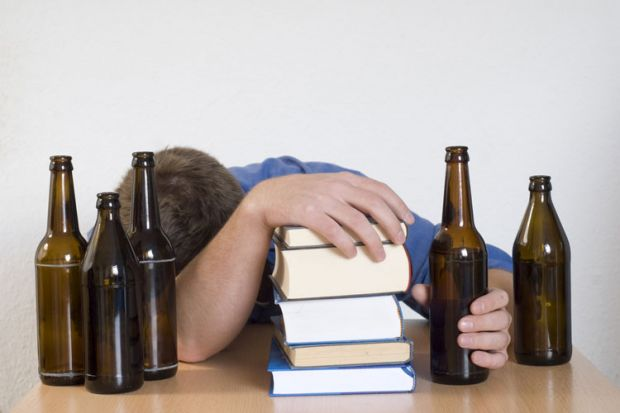

- **school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) - 2개 고등학교로 구성
- **sex** - student's sex (binary: 'F' - female or 'M' - male) - 성별
- **age** - student's age (numeric: from 15 to 22) - 나이 15~22
- **address** - student's home address type (binary: 'U' - urban or 'R' - rural) - 주소(도시, 시골) 
- **famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) - 가족구성원 수? LE3 3이하, GT3 3 이상
- **Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 부모 합가? 여부 T/A -> 0,1
- **Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)  - 모 학벌
- **Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education) - 부 학벌
- **Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') nominal
- **Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') nominal - at home 눈여겨볼 수 있을 듯
- **reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') - 학업을 위해서 진학했는지
- **guardian** - student's guardian (nominal: 'mother', 'father' or 'other') - guardian???? 지도자?
- **traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) - 등교시간
- **studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) - 공부시간
- **failures** - number of past class failures (numeric: n if 1<=n<3, else 4) - 학업 실패??
- **schoolsup** - extra educational support (binary: yes or no) - 추가 학습 여부
- **famsup** - family educational support (binary: yes or no) - 가족들의 공부 지원?
- **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) - 추가 학습 학원
- **activities** - extra-curricular activities (binary: yes or no) - 방과후 활동
- **nursery** - attended nursery school (binary: yes or no) - 보건??
- **higher** - wants to take higher education (binary: yes or no) - 고등교육 희망여부
- **internet** - Internet access at home (binary: yes or no) - 자택 인터넷 접속 가능 여부
- **romantic** - with a romantic relationship (binary: yes or no) - 연애중? 
- **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) - 가족간 사이
- **freetime** - free time after school (numeric: from 1 - very low to 5 - very high) - 방과 후 여가시간 있는지
- **goout** - going out with friends (numeric: from 1 - very low to 5 - very high) - 친구들과 사교
- **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) - 평일 알콜 섭취 정도
- **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) - 주말 알콜 섭취 정도
- **health** - current health status (numeric: from 1 - very bad to 5 - very good) - 현재 건강 상태
- **absences** - number of school absences (numeric: from 0 to 93) - 학교 결석 수

These grades are related with the course subject, Math(수학) or Portuguese(국어):
- **G1** - first period grade (numeric: from 0 to 20)
- **G2** - second period grade (numeric: from 0 to 20)
- **G3** - final grade (numeric: from 0 to 20, output target)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
portugese_student=pd.read_csv("./data/student-por.csv")
portugese_student.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
mat_student=pd.read_csv("./data/student-mat.csv")
mat_student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
print(portugese_student.columns)
print(mat_student.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [5]:
# 수학, 국어학생 구분 추가
portugese_student['Portugese'] = 1 #우뇌?
mat_student['Portugese'] = 0 #좌뇌?

In [6]:
data=pd.concat([portugese_student,mat_student],axis=0)

In [7]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Portugese
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,1


In [8]:
data.shape

(1044, 34)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1044.0,16.726054,1.239975,15.0,16.0,17.0,18.0,22.0
Medu,1044.0,2.603448,1.124907,0.0,2.0,3.0,4.0,4.0
Fedu,1044.0,2.387931,1.099938,0.0,1.0,2.0,3.0,4.0
traveltime,1044.0,1.522989,0.731727,1.0,1.0,1.0,2.0,4.0
studytime,1044.0,1.970307,0.834353,1.0,1.0,2.0,2.0,4.0
failures,1044.0,0.264368,0.656142,0.0,0.0,0.0,0.0,3.0
famrel,1044.0,3.935824,0.933401,1.0,4.0,4.0,5.0,5.0
freetime,1044.0,3.201149,1.031507,1.0,3.0,3.0,4.0,5.0
goout,1044.0,3.156130,1.152575,1.0,2.0,3.0,4.0,5.0
Dalc,1044.0,1.494253,0.911714,1.0,1.0,1.0,2.0,5.0


In [50]:
data.duplicated().sum()
# There are no duplicates

0

In [51]:
data.isnull().sum()
# There are no null values

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
Portugese     0
dtype: int64

In [52]:
data.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      35
G1            18
G2            17
G3            19
Portugese      2
dtype: int64

# EDA

## Univariate data analysis

F    591
M    453
Name: sex, dtype: int64


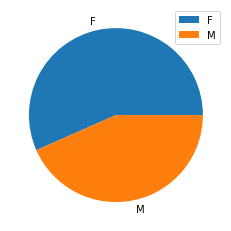

In [53]:
print(data['sex'].value_counts())
keys=['F','M']
plt.pie(data['sex'].value_counts(),labels=keys)
plt.legend()
plt.show()

- There are more number of females in the dataset compared to males

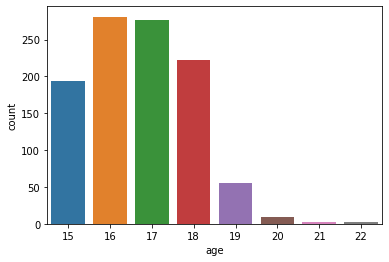

In [54]:
sns.countplot(x='age',data=data)
plt.show()

- More number of students  in the dataset are of age 16 followed by 17,18

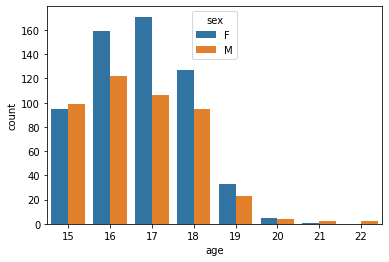

In [55]:
sns.countplot(x='age',hue='sex',data=data)
plt.show()

- We saw above that there were more studensts in 16,17 age group 
- in that more feamles are there becuse dataset contains more feamales values in dataset

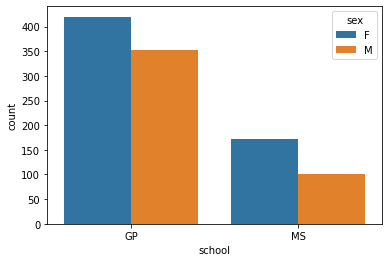

In [56]:
sns.countplot(x='school',hue='sex',data=data)
plt.show()

- Out of two colleges we have more number of students belong to the GP school comapared to MS 

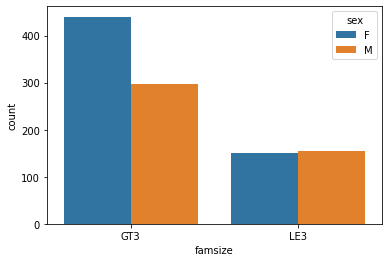

In [57]:
sns.countplot(x='famsize',hue='sex',data=data)
plt.show()

- Most of students who consume alcohol in our dataset have family size greater than 3 which means there might be economic issues the student is facing

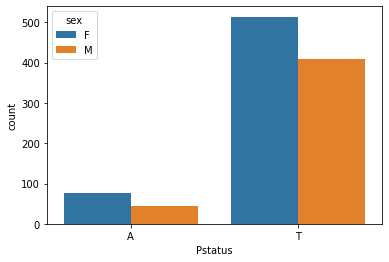

In [58]:
sns.countplot(x='Pstatus',hue='sex',data=data)
plt.show()

- Most of students parents live toggether compared to seaprated and apart

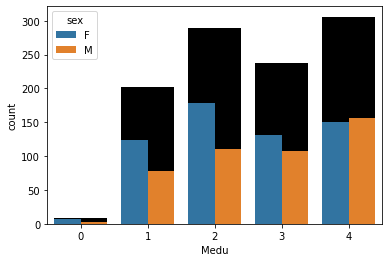

In [59]:
sns.countplot(x='Medu',color='black',data=data)
sns.countplot(x='Medu',hue='sex',data=data)
plt.show()

- There are more number of students whose mothers are received higher education follwed by  9th grad

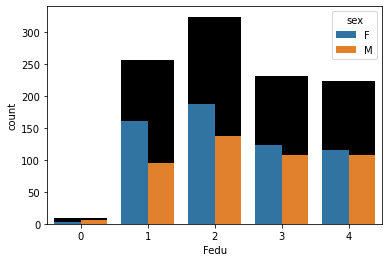

In [60]:
sns.countplot(x='Fedu',color='black',data=data)
sns.countplot(x='Fedu',hue='sex',data=data)
plt.show()

- There are more number of students whose fathers are received   9th grad education by 4th grad education

- Most of the studensts mothers do other jobs followed by services. 

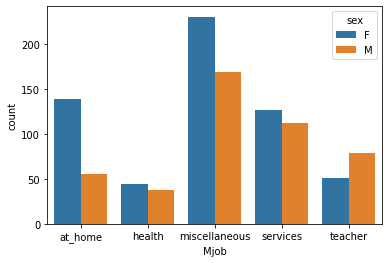

In [61]:
sns.countplot(x='Mjob',hue='sex',data=data)
plt.show()

In [62]:
#pip install wordcloud
from wordcloud import WordCloud

In [63]:
data['Mjob']=np.where(data['Mjob']=='other',"miscellaneous",data['Mjob'])

text = 
text = data['Mjob'].value_counts() 
str(text)

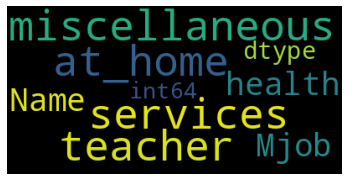

In [64]:
#pip install wordcloud
from wordcloud import WordCloud

# chaning it to miscellaneous
data['Mjob']=np.where(data['Mjob']=='other',"miscellaneous",data['Mjob'])


text = data['Mjob'].value_counts() 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

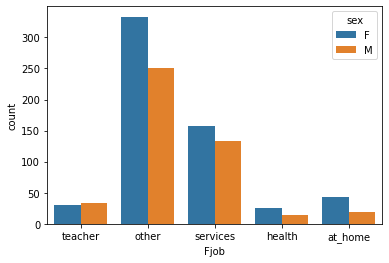

In [65]:
sns.countplot(x='Fjob',hue='sex',data=data)
plt.show()

- Most of the studensts fathers do other jobs followed by services. 

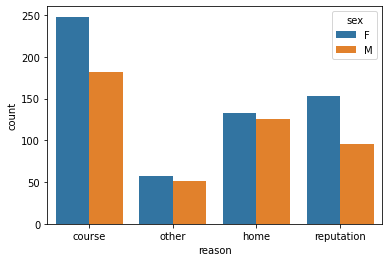

In [66]:
sns.countplot(x='reason',hue='sex',data=data)
plt.show()

- Most of the studnets choose thier college due to the courses followed by the reputation of college

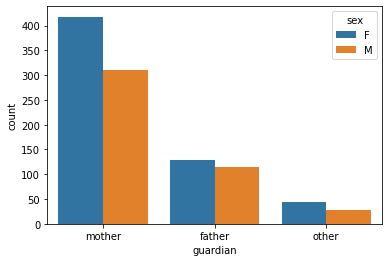

In [67]:
sns.countplot(x='guardian',hue='sex',data=data)
plt.show()

- Most of the students have their guardian as mothers comapred to other two categories

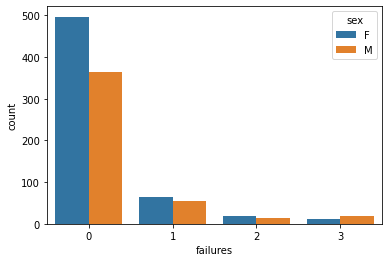

In [68]:
sns.countplot(x='failures',hue='sex',data=data)
plt.show()

- We see most of the students have not failed in exams before
- followed by 1 failure

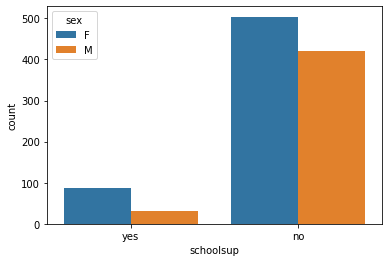

In [69]:
sns.countplot(x='schoolsup',hue='sex',data=data)
plt.show()

- we see that most of the students dont have extra educaitonal suport


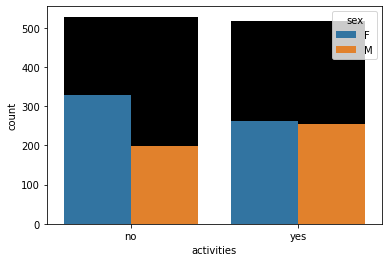

In [70]:
sns.countplot(x='activities',color='black',data=data)
sns.countplot(x='activities',hue='sex',data=data)
plt.show()

- Students involved and not-involved in extra curicullar activites are almost same
- Student who are not involved in are mostly females than than

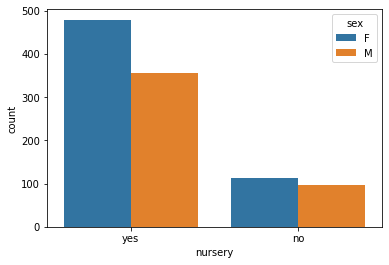

In [71]:
sns.countplot(x='nursery',hue='sex',data=data)
plt.show()

- Most students did attend the nursery eucation

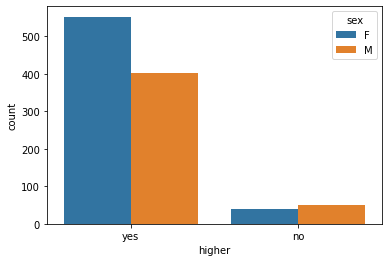

In [72]:
sns.countplot(x='higher',hue='sex',data=data)
plt.show()

- Most of the studenst did receive higher education

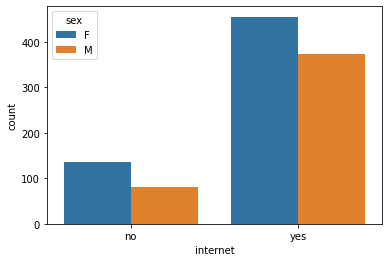

In [73]:
sns.countplot(x='internet',hue='sex',data=data)
plt.show()

- Most of the students have access to internet than those who dont

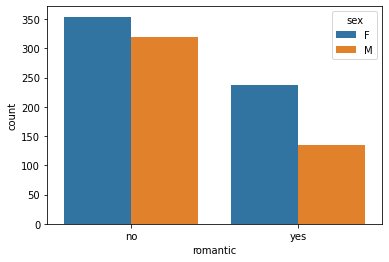

In [74]:
sns.countplot(x='romantic',hue='sex',data=data)
plt.show()

- Most of the students are not involved in any type of relatioship than those who are involved

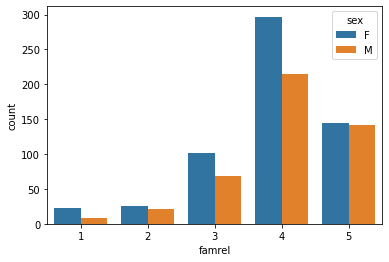

In [75]:
sns.countplot(x='famrel',hue='sex',data=data)
plt.show()

- We see that most of the studensts have a good relationship with the family

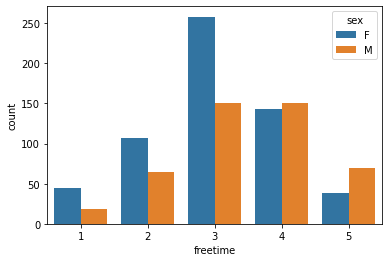

In [76]:
sns.countplot(x='freetime',hue='sex',data=data)
plt.show()

- Most of the students have minimul free time 

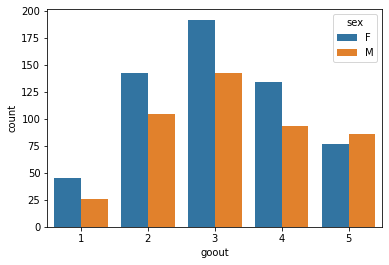

In [77]:
sns.countplot(x='goout',hue='sex',data=data)
plt.show()

- Most of the students go out  frequently

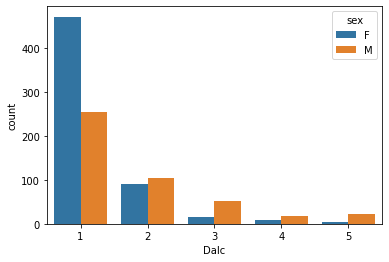

In [78]:
sns.countplot(x='Dalc',hue='sex',data=data)
plt.show()

- we see that there are more number of students who consume alcohol on workdays in less quanitity
- wheares most in the students who conumpe alochol on workdays on large quantity are mostly boys

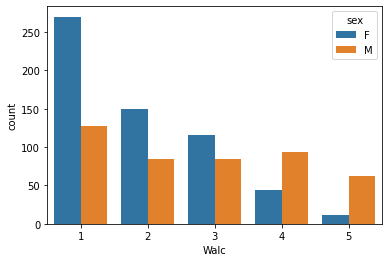

In [79]:
sns.countplot(x='Walc',hue='sex',data=data)
plt.show()

- We observe that most females consumes alcohol on weeekends in small quantity
- wheares most in the students who conumpe alochol on weekends on large quantity are mostly boys

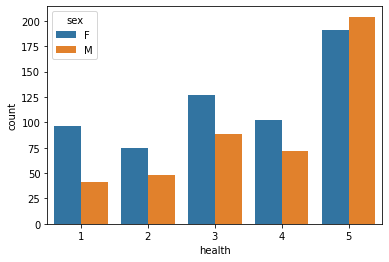

In [80]:
sns.countplot(x='health',hue='sex',data=data)
plt.show()

- we see that most of the students health is excelleent wehearas concering number of students lie in poor health condition

In [88]:
data = data.reset_index(drop=True)

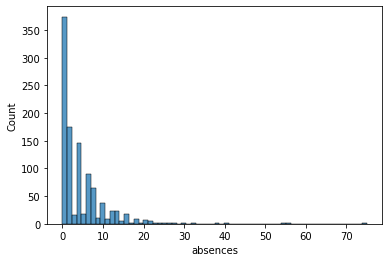

In [89]:
sns.histplot(x='absences',data=data)
plt.show()

- We observe that most of the student are 

In [90]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Portugese'],
      dtype='object')

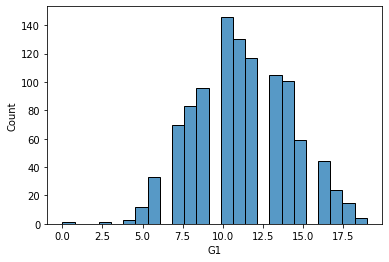

In [91]:
sns.histplot(x='G1',data=data)
plt.show()

- The grades g1 are normally distributed 
- with mode 10

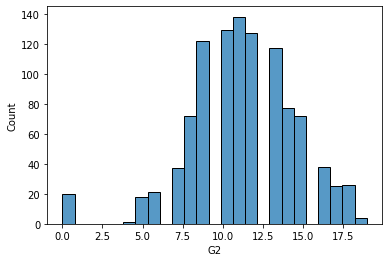

In [92]:
sns.histplot(x='G2',data=data)
plt.show()

- The marks G2 were normally distributed
- with mode of 11

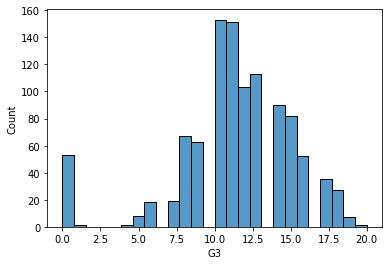

In [93]:
sns.histplot(x='G3',data=data)
plt.show()

- the marks are normally  distributed with mode 10

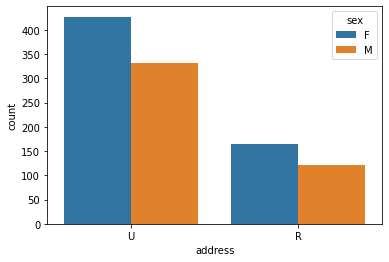

In [94]:
sns.countplot(x='address',hue='sex',data=data)
plt.show()

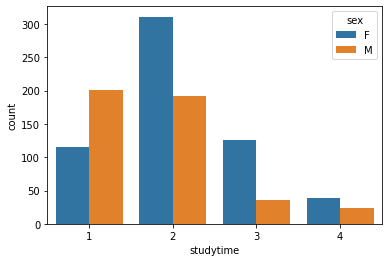

In [95]:
sns.countplot(x='studytime',hue='sex',data=data)
plt.show()

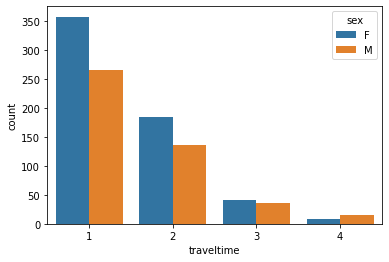

In [96]:
sns.countplot(x='traveltime',hue='sex',data=data)
plt.show()

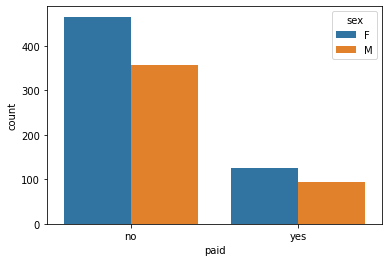

In [97]:
sns.countplot(x='paid',hue='sex',data=data)
plt.show()

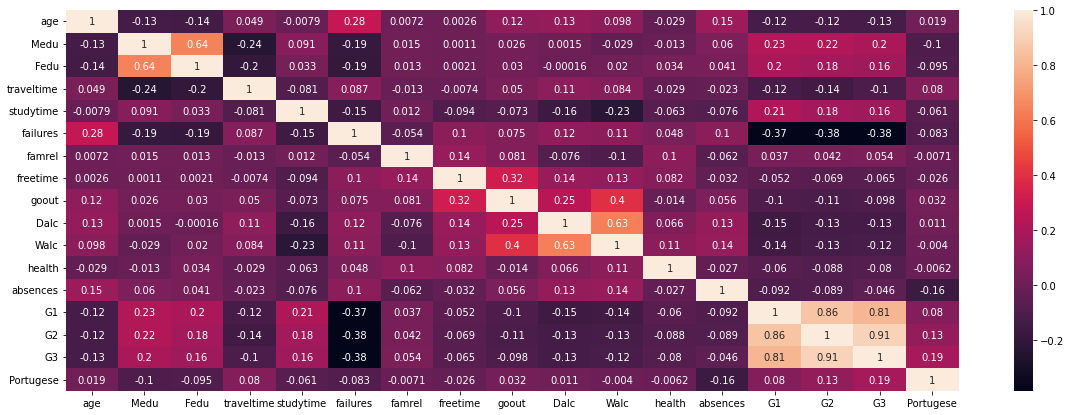

In [98]:
plt.figure(figsize=[20,7])
sns.heatmap(data.corr(),annot=True)
plt.show()

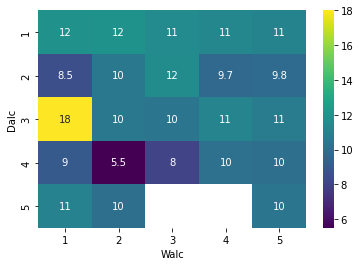

In [99]:
df_heatmap = data.pivot_table(values='G3',index='Dalc',columns='Walc',aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=True,cmap="viridis")
plt.show()

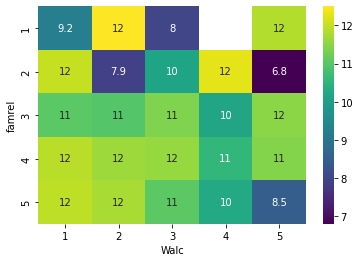

In [100]:
df_heatmap = data.pivot_table(values='G3',index='famrel',columns='Walc',aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=True,cmap="viridis")
plt.show()

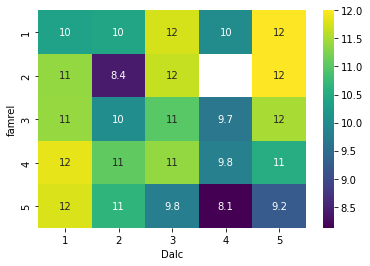

In [101]:
df_heatmap = data.pivot_table(values='G3',index='famrel',columns='Dalc',aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=True,cmap="viridis")
plt.show()

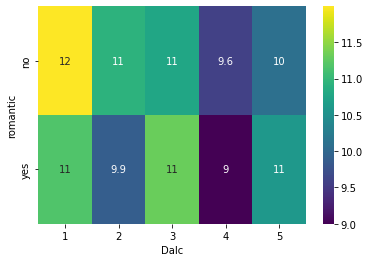

In [102]:
df_heatmap = data.pivot_table(values='G3',index='romantic',columns='Dalc',aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=True,cmap="viridis")
plt.show()

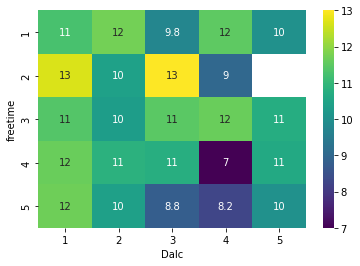

In [103]:
df_heatmap = data.pivot_table(values='G3',index='freetime',columns='Dalc')
sns.heatmap(df_heatmap,annot=True,cmap="viridis")
plt.show()

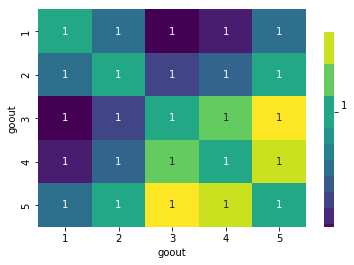

In [104]:
df_heatmap = data.pivot_table(values='G3',index='romantic',columns='goout')
sns.heatmap(df_heatmap.corr(),annot=True,cmap="viridis")
plt.show()

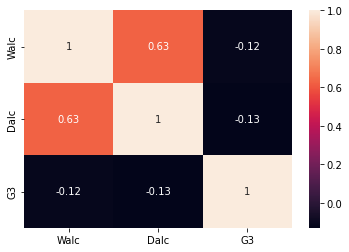

In [105]:
sns.heatmap(data[['Walc','Dalc','G3']].corr(),annot=True)
plt.show()

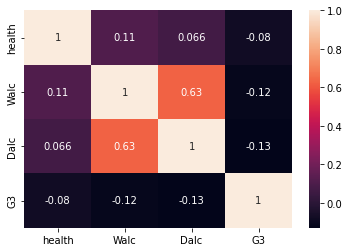

In [106]:
sns.heatmap(data[['health','Walc','Dalc','G3']].corr(),annot=True)
plt.show()

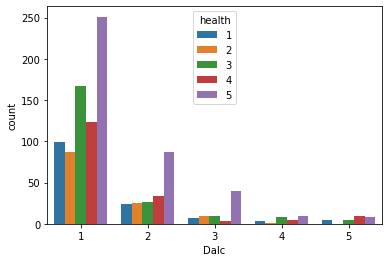

In [107]:
sns.countplot(x='Dalc',hue='health',data=data)
#sns.countplot(x='health',hue='Walc',data=data)
plt.show()

In [108]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Portugese'],
      dtype='object')

# Modelling

In [109]:
data.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      35
G1            18
G2            17
G3            19
Portugese      2
dtype: int64

In [110]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Portugese
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,1
4,GP,F,16,U,GT3,T,3,3,miscellaneous,other,...,3,2,1,2,5,0,11,13,13,1


# School 
- School has two categories

In [111]:
data['school'].unique()

array(['GP', 'MS'], dtype=object)

In [112]:
data['school']= np.where(data['school']=='GP',1,0)

# Sex
- Sex contains two categories

In [113]:
data['sex'].unique()

array(['F', 'M'], dtype=object)

In [114]:
data['sex']= np.where(data['sex']=='F',1,0)

# Adress 
- Adress is weather the students live in urban or rural area

In [115]:
print(data['address'].unique())
data['address']= np.where(data['address']=='U',1,0)

['U' 'R']


# Family Size
- wheater it is greater than 3 or lesser than 3

In [116]:
print(data['famsize'].unique())
data['famsize']= np.where(data['famsize']=='GT3',1,0)

['GT3' 'LE3']


# Pstatus 
- has two categories 
- whether parents live together or are separated

In [117]:
print(data['Pstatus'].unique())
data['Pstatus']= np.where(data['Pstatus']=='A',1,0)

['A' 'T']


# Medu
- is categorical variable with more than 5 categies 

In [118]:
data['Medu'].unique()

array([4, 1, 3, 2, 0])

In [119]:
mothers_edu = pd.get_dummies(data['Medu'],drop_first=True, prefix="Medu")
mothers_edu.head()
data=pd.concat([data,mothers_edu],axis=1)

In [120]:
data=data.drop(columns=['Medu'],axis=1)

# Fedu
- is categorical variable with more than 5 categies 

In [121]:
data['Fedu'].unique()

array([4, 1, 2, 3, 0])

In [122]:
fathers_edu = pd.get_dummies(data['Fedu'],drop_first=True, prefix="Fedu")
fathers_edu.head()
data=pd.concat([data,fathers_edu],axis=1)

In [123]:
data=data.drop(columns=['Fedu'],axis=1)

# Mjob
- Contains categories more than 5 

In [124]:
data['Mjob'].unique()

array(['at_home', 'health', 'miscellaneous', 'services', 'teacher'],
      dtype=object)

In [125]:
Mothers_job = pd.get_dummies(data['Mjob'],drop_first=True, prefix="Mjob")
Mothers_job.head()
data=pd.concat([data,Mothers_job],axis=1)

In [126]:
data=data.drop(columns=['Mjob'],axis=1)

# Fjob

In [127]:
data['Fjob'].unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

In [128]:
fathers_job = pd.get_dummies(data['Fjob'],drop_first=True, prefix="Fjob")
fathers_job.head()
data=pd.concat([data,fathers_job],axis=1)

In [129]:
data=data.drop(columns=['Fjob'],axis=1)

# reasons

In [130]:
data['reason'].unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

In [131]:
reason = pd.get_dummies(data['reason'],drop_first=True, prefix="reason")
reason.head()
data=pd.concat([data,reason],axis=1)

In [132]:
data=data.drop(columns=['reason'],axis=1)

# guardian

In [133]:
data['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

In [134]:
guardian = pd.get_dummies(data['guardian'],drop_first=True, prefix="guardian")
reason.head()
data=pd.concat([data,guardian],axis=1)
data=data.drop(columns=['guardian'],axis=1)

# traveltime

In [135]:
data['traveltime'].nunique()

4

In [136]:
traveltime = pd.get_dummies(data['traveltime'],drop_first=True, prefix="traveltime")
traveltime.head()
data=pd.concat([data,traveltime],axis=1)
data=data.drop(columns=['traveltime'],axis=1)

# failures

In [137]:
data['studytime'].unique()

array([2, 3, 1, 4])

In [138]:
studytime = pd.get_dummies(data['studytime'],drop_first=True, prefix="studytime")
studytime.head()
data=pd.concat([data,studytime],axis=1)
data=data.drop(columns=['studytime'],axis=1)

# Failures

In [139]:
data['failures'].unique()

array([0, 3, 1, 2])

In [140]:
failures = pd.get_dummies(data['failures'],drop_first=True, prefix="failures")
failures.head()
data=pd.concat([data,failures],axis=1)
data=data.drop(columns=['failures'],axis=1)

# school sup

In [141]:
data['schoolsup'].unique()
data['schoolsup']= np.where(data['schoolsup']=='yes',1,0)

# famsup

In [142]:
data['famsup'].unique()
data['famsup']= np.where(data['famsup']=='yes',1,0)

# ACTIVITIES

In [143]:
data['activities'].unique()
data['activities']= np.where(data['activities']=='yes',1,0)

# Nursery

In [144]:
data['nursery'].unique()
data['nursery']= np.where(data['nursery']=='yes',1,0)

# Higher

In [145]:
data['higher'].unique()
data['higher']= np.where(data['higher']=='yes',1,0)

# internet

In [146]:
data['internet'].unique()
data['internet']= np.where(data['internet']=='yes',1,0)

# romantic

In [147]:
data['romantic'].unique()
data['romantic']= np.where(data['romantic']=='yes',1,0)

# paid

In [148]:
data['paid'].unique()
data['paid']= np.where(data['paid']=='yes',1,0)

# famrel

In [149]:
famrel = pd.get_dummies(data['famrel'],drop_first=True, prefix="famrel")
famrel.head()
data=pd.concat([data,famrel],axis=1)
data=data.drop(columns=['famrel'],axis=1)

# freetime

In [150]:
freetime = pd.get_dummies(data['freetime'],drop_first=True, prefix="freetime")
freetime.head()
data=pd.concat([data,freetime],axis=1)
data=data.drop(columns=['freetime'],axis=1)

# goout

In [151]:
goout = pd.get_dummies(data['goout'],drop_first=True, prefix="goout")
goout.head()
data=pd.concat([data,goout],axis=1)
data=data.drop(columns=['goout'],axis=1)

# Dalc

In [152]:
Dalc = pd.get_dummies(data['Dalc'],drop_first=True, prefix="Dalc")
Dalc.head()
data=pd.concat([data,Dalc],axis=1)
data=data.drop(columns=['Dalc'],axis=1)

# Walc

In [153]:
Walc = pd.get_dummies(data['Walc'],drop_first=True, prefix="Walc")
Walc.head()
data=pd.concat([data,Walc],axis=1)
data=data.drop(columns=['Walc'],axis=1)

# health

health = pd.get_dummies(data['health'],drop_first=True, prefix="health")
health.head()
data=pd.concat([data,health],axis=1)
data=data.drop(columns=['health'],axis=1)

In [154]:
data.nunique()

school     2
sex        2
age        8
address    2
famsize    2
          ..
Dalc_5     2
Walc_2     2
Walc_3     2
Walc_4     2
Walc_5     2
Length: 70, dtype: int64

In [155]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'health', 'absences', 'G1', 'G2', 'G3', 'Portugese',
       'Medu_1', 'Medu_2', 'Medu_3', 'Medu_4', 'Fedu_1', 'Fedu_2', 'Fedu_3',
       'Fedu_4', 'Mjob_health', 'Mjob_miscellaneous', 'Mjob_services',
       'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_mother', 'guardian_other', 'traveltime_2', 'traveltime_3',
       'traveltime_4', 'studytime_2', 'studytime_3', 'studytime_4',
       'failures_1', 'failures_2', 'failures_3', 'famrel_2', 'famrel_3',
       'famrel_4', 'famrel_5', 'freetime_2', 'freetime_3', 'freetime_4',
       'freetime_5', 'goout_2', 'goout_3', 'goout_4', 'goout_5', 'Dalc_2',
       'Dalc_3', 'Dalc_4', 'Dalc_5', 'Walc_2', 'Walc_3', 'Walc_4', 'Walc_5'],
      dtype='object')

In [156]:
import xgboost
from xgboost import XGBRegressor
import lightgbm
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


lightgbm 회귀모델

In [183]:
X=data.copy()
X=X.drop(columns=['health'], axis=1)

In [184]:
y=data['health']

In [185]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size =0.2)

In [188]:
lightgbm1 = LGBMRegressor(random_state=2023)
lightgbm1.fit(train_X,train_y)

LGBMRegressor(random_state=2023)

In [190]:
pred_y = lightgbm1.predict(test_X)

### 변수 중요도

In [172]:
from lightgbm import plot_importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

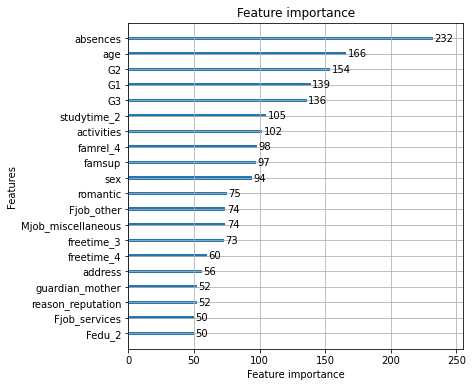

In [191]:
f, ax = plt.subplots(figsize=(6, 6))
plot_importance(lightgbm1, max_num_features=20, ax=ax)

관계의 선후 관계가 명확하지 않음, 질병에 의한 결석 및 성적 하락 등이 연계되어 있음

In [180]:
import shap 

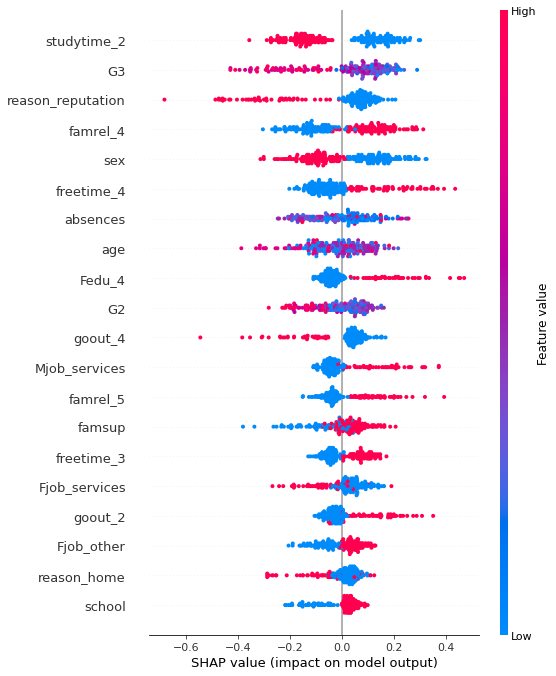

In [197]:
shap.initjs()

shap_values = shap.TreeExplainer(lightgbm1).shap_values(test_X)

shap.summary_plot(shap_values, test_X)

In [201]:
shap_values

array([[ 0.01926012, -0.13071983,  0.12904228, ...,  0.08720639,
        -0.01412655, -0.01216436],
       [ 0.06316842, -0.07685548, -0.10353938, ..., -0.0085356 ,
        -0.00974532, -0.0083216 ],
       [ 0.02503466, -0.13720166, -0.05115786, ...,  0.00304659,
        -0.04604295, -0.01068247],
       ...,
       [-0.06626785, -0.12054723, -0.00788168, ..., -0.00463826,
        -0.01578956, -0.02127762],
       [ 0.03523119,  0.06401664, -0.12914542, ..., -0.02324105,
        -0.00020503, -0.01309515],
       [ 0.07460107,  0.01055592, -0.14893185, ..., -0.01098102,
        -0.03732017, -0.01299053]])

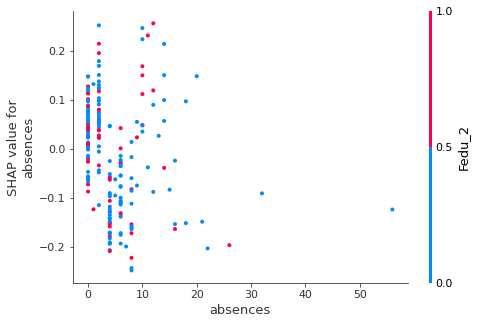

In [202]:
shap.dependence_plot("absences", shap_values, test_X)

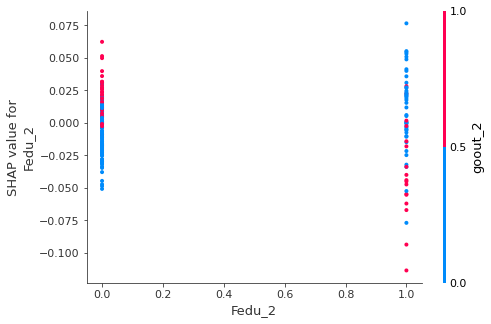

In [203]:
shap.dependence_plot("Fedu_2", shap_values, test_X)

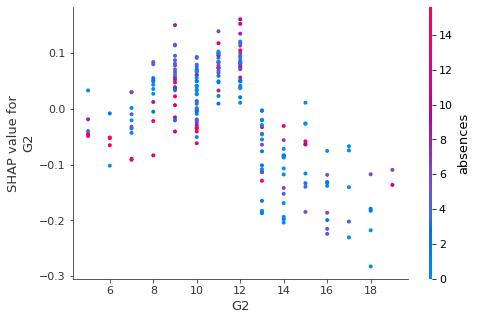

In [204]:
shap.dependence_plot("G2", shap_values, test_X)

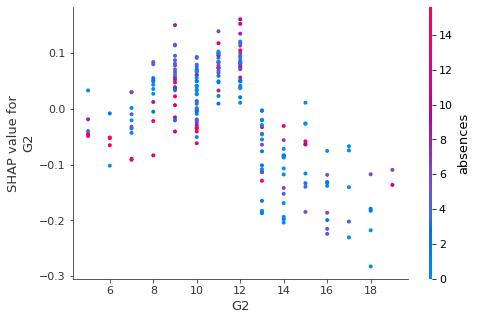

In [204]:
shap.dependence_plot("G2", shap_values, test_X)

In [168]:
X=X.drop(columns=['G3'],axis=1)

In [118]:
import statsmodels.api as sm

In [119]:
X.columns
X=sm.add_constant(X)

In [120]:
y= data['G3']

# Model Building

# First Cut Model

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [125]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [126]:
LR_train = sm.OLS(y_train,X_train).fit()
pred= LR_train.predict()

In [127]:
print(LR_train.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     51.87
Date:                Mon, 27 Mar 2023   Prob (F-statistic):          2.31e-224
Time:                        22:37:00   Log-Likelihood:                -1334.6
No. Observations:                 730   AIC:                             2813.
Df Residuals:                     658   BIC:                             3144.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.4503      1

In [128]:
LR_test = sm.OLS(y_test,X_test).fit()
pred= LR_test.predict()
print(LR_test.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     25.69
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           1.23e-80
Time:                        22:37:01   Log-Likelihood:                -532.39
No. Observations:                 314   AIC:                             1209.
Df Residuals:                     242   BIC:                             1479.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.5669      2

So all the variables are not making sense.. we have a very high R2 and most of the variables are not significant. So lets try buildign model only for coefficients which ar significant 

In [129]:
X=data[['schoolsup','G2','famrel_2',  'Dalc_2']]
X=sm.add_constant(X)

In [130]:
y=data['G3']

In [131]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [132]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [133]:
LR_train = sm.OLS(y_train,X_train).fit()
pred= LR_train.predict()
print(LR_train.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     840.9
Date:                Mon, 27 Mar 2023   Prob (F-statistic):          1.44e-270
Time:                        22:37:03   Log-Likelihood:                -1391.8
No. Observations:                 730   AIC:                             2794.
Df Residuals:                     725   BIC:                             2817.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7652      0.228     -3.353      0.0

In [134]:
LR_test = sm.OLS(y_test,X_test).fit()
pred= LR_test.predict()
print(LR_test.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     449.3
Date:                Mon, 27 Mar 2023   Prob (F-statistic):          2.17e-127
Time:                        22:37:03   Log-Likelihood:                -567.71
No. Observations:                 314   AIC:                             1145.
Df Residuals:                     309   BIC:                             1164.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2543      0.304     -0.837      0.4

This model is also overfitting the data we should check with other variables

# Feature Selection

In [135]:
X=data.copy()
X=X.drop(columns=['G3'],axis=1)
y=data['G3']

In [136]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [138]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [139]:
sel.get_support()

array([False,  True,  True, False,  True, False, False,  True,  True,
        True, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [140]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
selected_feat

Index(['sex', 'age', 'famsize', 'famsup', 'paid', 'activities', 'romantic',
       'absences', 'G1', 'G2', 'studytime_2', 'famrel_4'],
      dtype='object')

In [141]:
X=data[[ 'famsup', 'paid', 'activities', 'romantic', 'absences',
       'G2', 'studytime_2', 'famrel_4', 'goout_3', 'health_5']].copy()
# Removing  age,'G1' becuase its having high correlation with target varaible
y=data['G3']

In [142]:
X=sm.add_constant(X)

In [143]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [144]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [145]:
LR_train = sm.OLS(y_train,X_train).fit()
pred= LR_train.predict()
print(LR_train.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     340.6
Date:                Mon, 27 Mar 2023   Prob (F-statistic):          5.69e-265
Time:                        22:37:07   Log-Likelihood:                -1385.5
No. Observations:                 730   AIC:                             2793.
Df Residuals:                     719   BIC:                             2844.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.8334      0.266     -3.131      

In [146]:
LR_test = sm.OLS(y_test,X_test).fit()
pred= LR_test.predict()
print(LR_test.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     179.7
Date:                Mon, 27 Mar 2023   Prob (F-statistic):          5.39e-121
Time:                        22:37:07   Log-Likelihood:                -565.13
No. Observations:                 314   AIC:                             1152.
Df Residuals:                     303   BIC:                             1193.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.9215      0.371     -2.487      

In [147]:
pred

array([10.35796175,  9.81368225, 14.48732782,  8.41342414, 11.019788  ,
        3.68345864, 14.00636535, 10.24725485, 12.00900338,  9.96914264,
       13.31774784,  7.27392575,  5.05777051, 13.12296464, 12.98556907,
       10.12601275, 13.02189645, 18.67835458, 16.52523963,  8.26453518,
       11.93766389, 15.78841702,  8.20825109, 12.07718996, 11.14466631,
       10.92011904, 14.6165523 , 14.79218685, 13.57923898, 12.08674813,
       11.84286561,  4.75027813,  9.31696852,  8.13519578, 15.56387844,
       12.37304135, 10.64405634, 11.08605479,  8.1685877 ,  9.97450247,
       14.16259543, 16.54907338, 12.93229375, 10.98900704, 11.45092612,
        7.75936354,  7.31720903, 15.50819168,  7.83690877, 10.88464191,
        6.59240477, 11.87695221,  6.62348494,  8.73624676, 12.33198547,
        8.63656104,  8.34122581, 17.13905941,  9.37366845, 10.23314352,
       -0.55107661, 14.5466474 , 11.14918748,  6.64972144, 10.43439098,
       12.93665635, 15.37063665, 10.24029895, -0.39177054, 15.50

# checking for multicolinearity

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [149]:
# the independent variables set
X = data[[ 'famsup', 'paid', 'activities', 'romantic', 'absences',
       'G2', 'studytime_2', 'famrel_4', 'goout_3', 'health_5']] #,'age','G1'
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

       feature       VIF
0       famsup  2.533634
1         paid  1.312922
2   activities  1.940579
3     romantic  1.525813
4     absences  1.486763
5           G2  4.777021
6  studytime_2  1.898026
7     famrel_4  1.981479
8      goout_3  1.462667
9     health_5  1.555615
